# Marker Genes and Annotation

In [29]:
import scanpy as sc
import pandas as pd

adata = sc.read(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\processed\adata_umap_clusters_leiden0.6.h5ad")

adata


AnnData object with n_obs × n_vars = 178971 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mt', 'Patient', 'Gender', 'Subtype', 'Stage', 'seurat_clusters', 'Study', 'Cell_Cluster_level1', 'Cell_Cluster_level2', 'validation_original_annotation', 'id', 'predicted.celltypel1.score', 'predicted.celltypel1', 'predicted.celltypel2.score', 'predicted.celltypel2', 'leiden_r0.6', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Patient_colors', 'Subtype_colors', 'X_name', 'hvg', 'leiden', 'leiden_colors', 'leiden_r0.3', 'leiden_r0.3_colors', 'leiden_r0.6', 'leiden_r0.6_colors', 'leiden_r1.0', 'leiden_r1.0_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Identifying marker genes per cluster using Wilcoxon rank sum
### Each Leiden cluster:
- compares cells inside the cluster
- vs all other cells
- finds genes that are:
* consistently higher
* statistically significant

In [30]:
sc.tl.rank_genes_groups(
    adata,
    groupby='leiden',
    method='wilcoxon',
    key_added='rank_genes_leiden'
)

c:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\.venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:483: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\.venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:483: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\.venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:483: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\.venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:483: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.lo

Visualise top markers

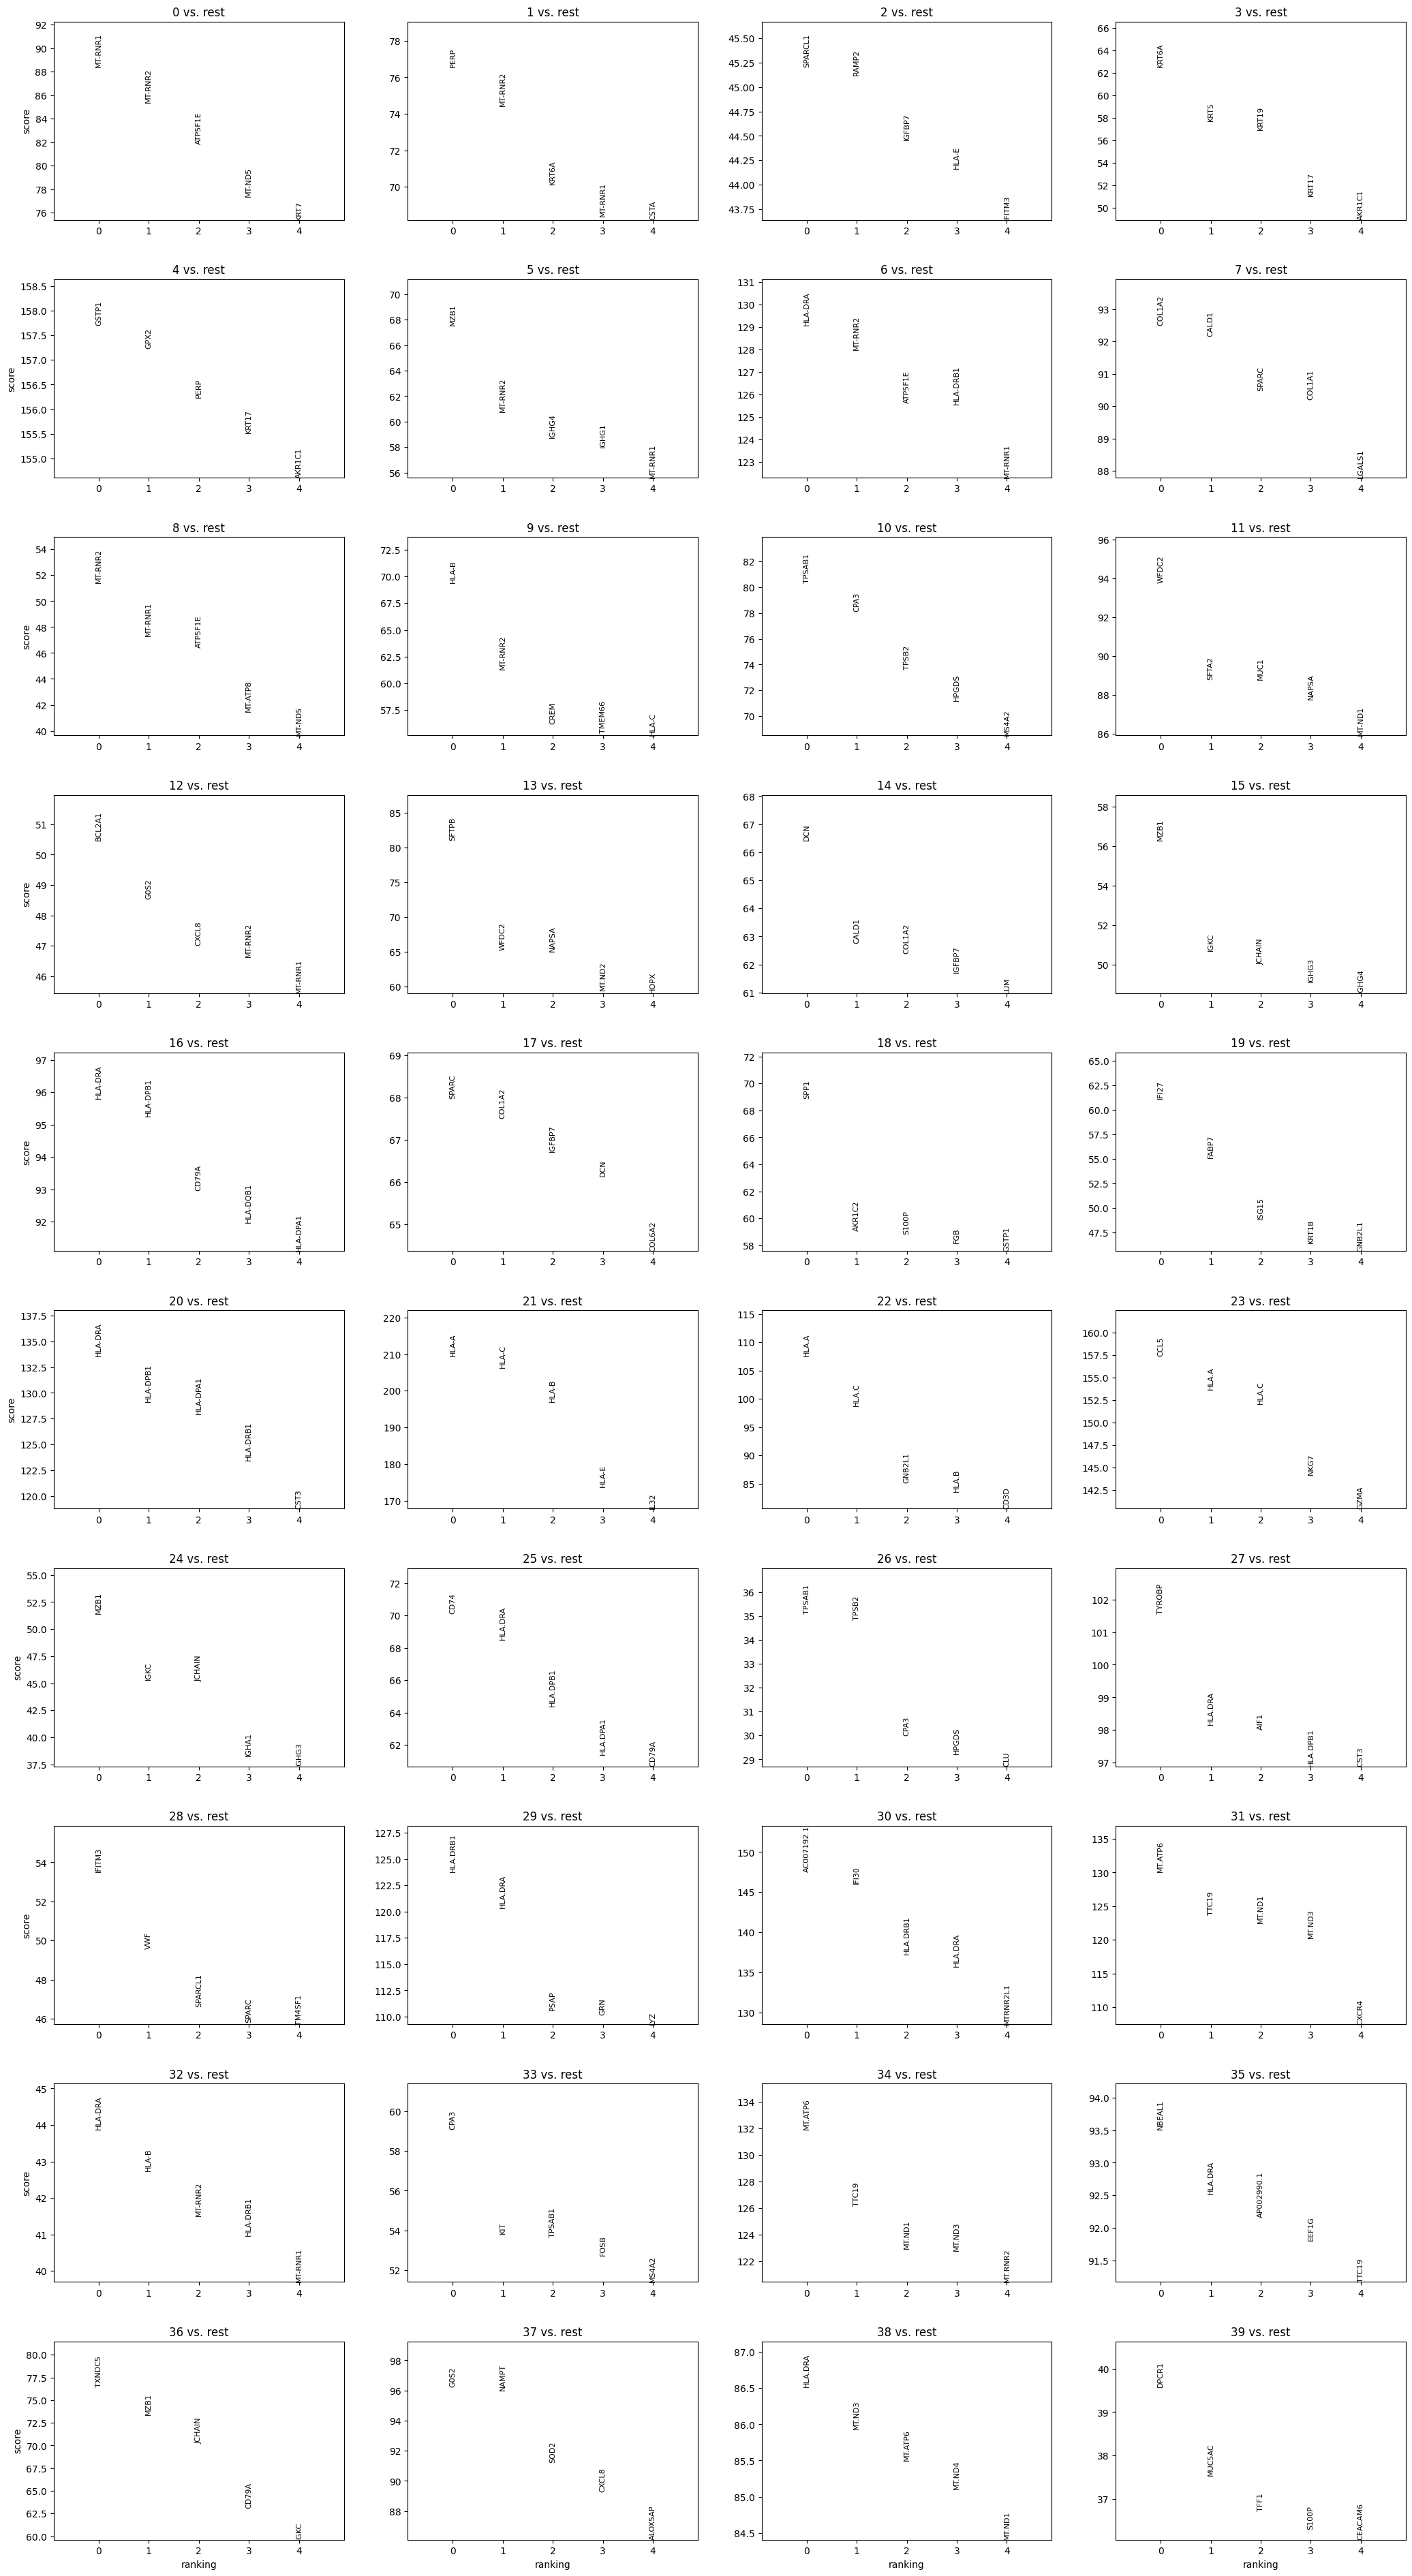

In [31]:
sc.pl.rank_genes_groups(
    adata,
    key='rank_genes_leiden',
    n_genes=5,
    sharey=False
)

## Extracting marker tables

In [32]:
markers = sc.get.rank_genes_groups_df(
    adata, 
    group=None, 
    key='rank_genes_leiden'
    )

markers.to_csv(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\results\tables\leiden_marker_genes.csv", index=False)
markers.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MT-RNR1,88.362389,NaN,0.0,0.0
1,0,MT-RNR2,85.375183,NaN,0.0,0.0
2,0,ATP5F1E,81.868385,NaN,0.0,0.0
3,0,MT-ND5,77.401108,NaN,0.0,0.0
4,0,KRT7,75.397446,NaN,0.0,0.0


## Comparing Leiden clusters to known annotations

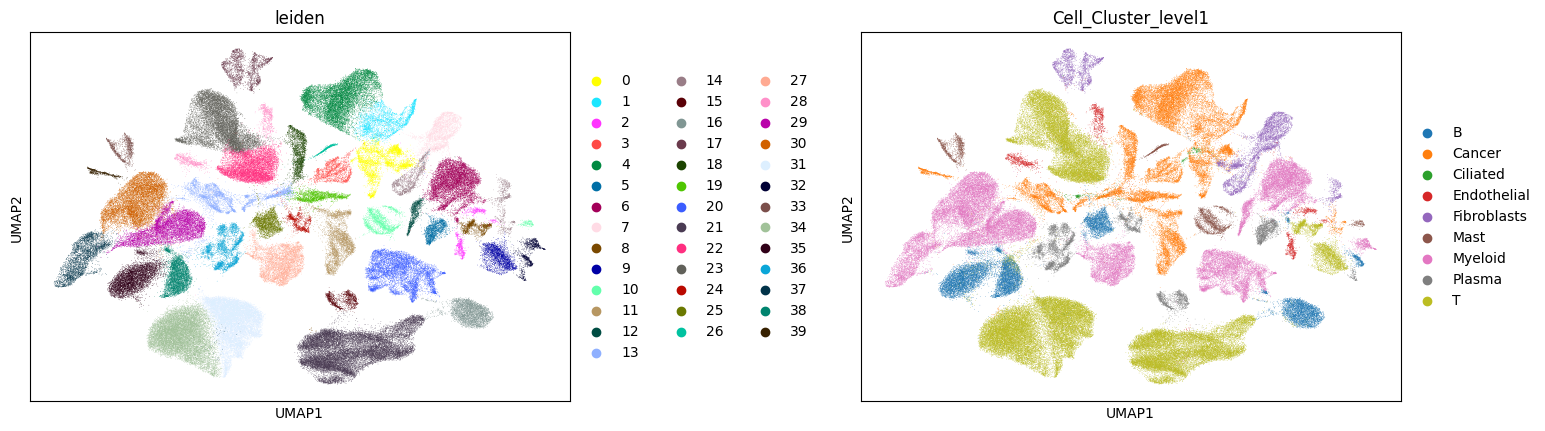

In [33]:
sc.pl.umap(
    adata,
    color=["leiden", "Cell_Cluster_level1"],
    wspace=0.4,
)

## Quanitfying overlap

In [34]:
ct_table = pd.crosstab(
    adata.obs['leiden'],
    adata.obs['Cell_Cluster_level1'],
    normalize='index'
)

ct_table

Cell_Cluster_level1,B,Cancer,Ciliated,Endothelial,Fibroblasts,Mast,Myeloid,Plasma,T
leiden,,,,,,,,,
0,0.000987,0.737596,0.040237,0.001975,0.198963,0.000000,0.002962,0.000000,0.017280
1,0.000000,0.983774,0.000705,0.000353,0.001058,0.000000,0.002469,0.009524,0.002116
2,0.000000,0.000000,0.001074,0.994629,0.002148,0.000000,0.002148,0.000000,0.000000
3,0.000000,0.997235,0.001106,0.000000,0.000000,0.000000,0.000553,0.000000,0.001106
4,0.000000,0.995962,0.000202,0.000202,0.000101,0.000404,0.000808,0.000101,0.002221
5,0.003984,0.002277,0.000000,0.000569,0.007399,0.002277,0.004553,0.974957,0.003984
6,0.016376,0.004061,0.000131,0.000131,0.000262,0.000917,0.975108,0.000131,0.002882
7,0.000000,0.003000,0.000000,0.006667,0.989333,0.000000,0.001000,0.000000,0.000000
8,0.004006,0.000801,0.000000,0.000000,0.000000,0.000000,0.001603,0.002404,0.991186


In [35]:
cluster_to_celltype = {}

for cluster in ct_table.index:
    row = ct_table.loc[cluster]
    celltype = ct_table.loc[cluster].idxmax()
    proportion = row.max()

    if proportion < 0.6:
        cluster_to_celltype[cluster] = "Unknown"
    else:
        cluster_to_celltype[cluster] = celltype
    print(
        f"leiden cluster {cluster} is mostly {celltype} "
        f"with a proportion of {proportion:.2f}"
    )
    

cluster_to_celltype


leiden cluster 0 is mostly Cancer with a proportion of 0.74
leiden cluster 1 is mostly Cancer with a proportion of 0.98
leiden cluster 2 is mostly Endothelial with a proportion of 0.99
leiden cluster 3 is mostly Cancer with a proportion of 1.00
leiden cluster 4 is mostly Cancer with a proportion of 1.00
leiden cluster 5 is mostly Plasma with a proportion of 0.97
leiden cluster 6 is mostly Myeloid with a proportion of 0.98
leiden cluster 7 is mostly Fibroblasts with a proportion of 0.99
leiden cluster 8 is mostly T with a proportion of 0.99
leiden cluster 9 is mostly T with a proportion of 0.99
leiden cluster 10 is mostly Mast with a proportion of 1.00
leiden cluster 11 is mostly Cancer with a proportion of 0.99
leiden cluster 12 is mostly Myeloid with a proportion of 1.00
leiden cluster 13 is mostly Cancer with a proportion of 0.92
leiden cluster 14 is mostly Fibroblasts with a proportion of 0.86
leiden cluster 15 is mostly Plasma with a proportion of 1.00
leiden cluster 16 is mostly B

{'0': 'Cancer',
 '1': 'Cancer',
 '2': 'Endothelial',
 '3': 'Cancer',
 '4': 'Cancer',
 '5': 'Plasma',
 '6': 'Myeloid',
 '7': 'Fibroblasts',
 '8': 'T',
 '9': 'T',
 '10': 'Mast',
 '11': 'Cancer',
 '12': 'Myeloid',
 '13': 'Cancer',
 '14': 'Fibroblasts',
 '15': 'Plasma',
 '16': 'B',
 '17': 'Fibroblasts',
 '18': 'Cancer',
 '19': 'Cancer',
 '20': 'Myeloid',
 '21': 'T',
 '22': 'T',
 '23': 'T',
 '24': 'Plasma',
 '25': 'B',
 '26': 'Mast',
 '27': 'Myeloid',
 '28': 'Endothelial',
 '29': 'Myeloid',
 '30': 'Myeloid',
 '31': 'T',
 '32': 'Unknown',
 '33': 'Mast',
 '34': 'T',
 '35': 'B',
 '36': 'Plasma',
 '37': 'Myeloid',
 '38': 'B',
 '39': 'Cancer'}

## Assigning biological labels to clusters

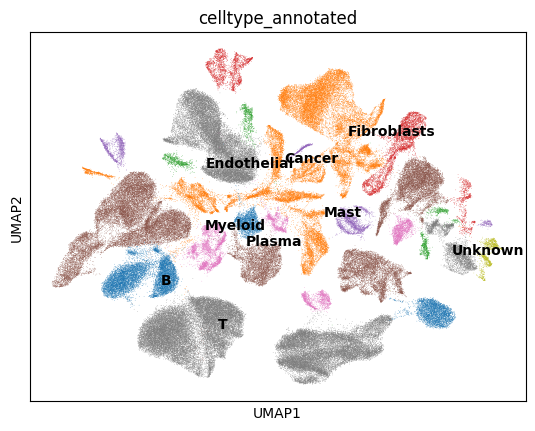

In [36]:
adata.obs["celltype_annotated"] = (
    adata.obs["leiden"].map(cluster_to_celltype).fillna("Unknown")
)

sc.pl.umap(
    adata,
    color="celltype_annotated",
    legend_loc="on data",
)

## Saving figure

In [37]:
adata.write(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\processed\adata_annotated_level1.h5ad")